CODE BLOCK: 1

In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/ERA_v1/Assignment2/to_submit/

/content/drive/MyDrive/ERA_v1/Assignment2/to_submit


In [4]:
!ls

model.py  S5_bkup1.ipynb  S5.ipynb  utils.py


In [5]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [6]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


CODE BLOCK: 3

In [7]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  #
])

CODE BLOCK: 4

In [8]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)  #

CODE BLOCK: 5

In [9]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'num_workers': 2, 'pin_memory': True}  #

test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)  #
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)

CODE BLOCK: 6

In [10]:
from utils import display_data, display_model_stats

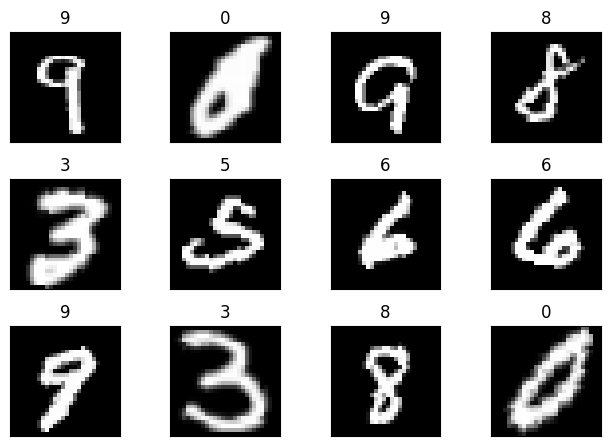

In [11]:
display_data(train_loader)

CODE BLOCK: 7

In [12]:
import model
from model import Net, Net2

In [13]:
model = Net().to(device)
model.summary(input_size=(1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Net                                      [1, 28, 28]               [1, 10]                   --                             --
├─Conv2d: 1-1                            [1, 28, 28]               [32, 26, 26]              320                         0.05%
├─Conv2d: 1-2                            [32, 26, 26]              [64, 24, 24]              18,496                      3.12%
├─Conv2d: 1-3                            [64, 12, 12]              [128, 10, 10]             73,856                     12.45%
├─Conv2d: 1-4                            [128, 10, 10]             [256, 8, 8]               295,168                    49.76%
├─Linear: 1-5                            [1, 4096]                 [1, 50]                   204,850                    34.53%
├─Linear: 1-6                            [1, 50]                   [1, 10]                   510               

CODE BLOCK: 9

In [14]:
from model import train, test

CODE BLOCK: 10

In [15]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  #
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.cross_entropy
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_acc, test_losses = test(model, device, test_loader, criterion)  #
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.2485 Batch_id=117 Accuracy=24.78: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 2.2442, Accuracy: 3144/10000 (31.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2065 Batch_id=117 Accuracy=70.29: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.1545, Accuracy: 9539/10000 (95.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1376 Batch_id=117 Accuracy=94.89: 100%|██████████| 118/118 [00:21<00:00,  5.62it/s]


Test set: Average loss: 0.0901, Accuracy: 9699/10000 (96.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0778 Batch_id=117 Accuracy=96.34: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0559, Accuracy: 9822/10000 (98.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1038 Batch_id=117 Accuracy=97.00: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0537, Accuracy: 9830/10000 (98.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0944 Batch_id=117 Accuracy=97.43: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0423, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0291 Batch_id=117 Accuracy=97.88: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0437, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0322 Batch_id=117 Accuracy=98.06: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0331, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1028 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:23<00:00,  5.13it/s]


Test set: Average loss: 0.0410, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0481 Batch_id=117 Accuracy=98.35: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.0279, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0084 Batch_id=117 Accuracy=98.44: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0262, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0238 Batch_id=117 Accuracy=98.51: 100%|██████████| 118/118 [00:22<00:00,  5.16it/s]


Test set: Average loss: 0.0304, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0360 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:22<00:00,  5.22it/s]


Test set: Average loss: 0.0367, Accuracy: 9881/10000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0066 Batch_id=117 Accuracy=98.71: 100%|██████████| 118/118 [00:20<00:00,  5.65it/s]


Test set: Average loss: 0.0273, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0236 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:21<00:00,  5.44it/s]


Test set: Average loss: 0.0280, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0039 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:22<00:00,  5.16it/s]


Test set: Average loss: 0.0215, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0566 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [00:22<00:00,  5.13it/s]


Test set: Average loss: 0.0206, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0908 Batch_id=117 Accuracy=99.03: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: 0.0207, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0535 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:24<00:00,  4.86it/s]


Test set: Average loss: 0.0207, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0062 Batch_id=117 Accuracy=99.05: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.0206, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

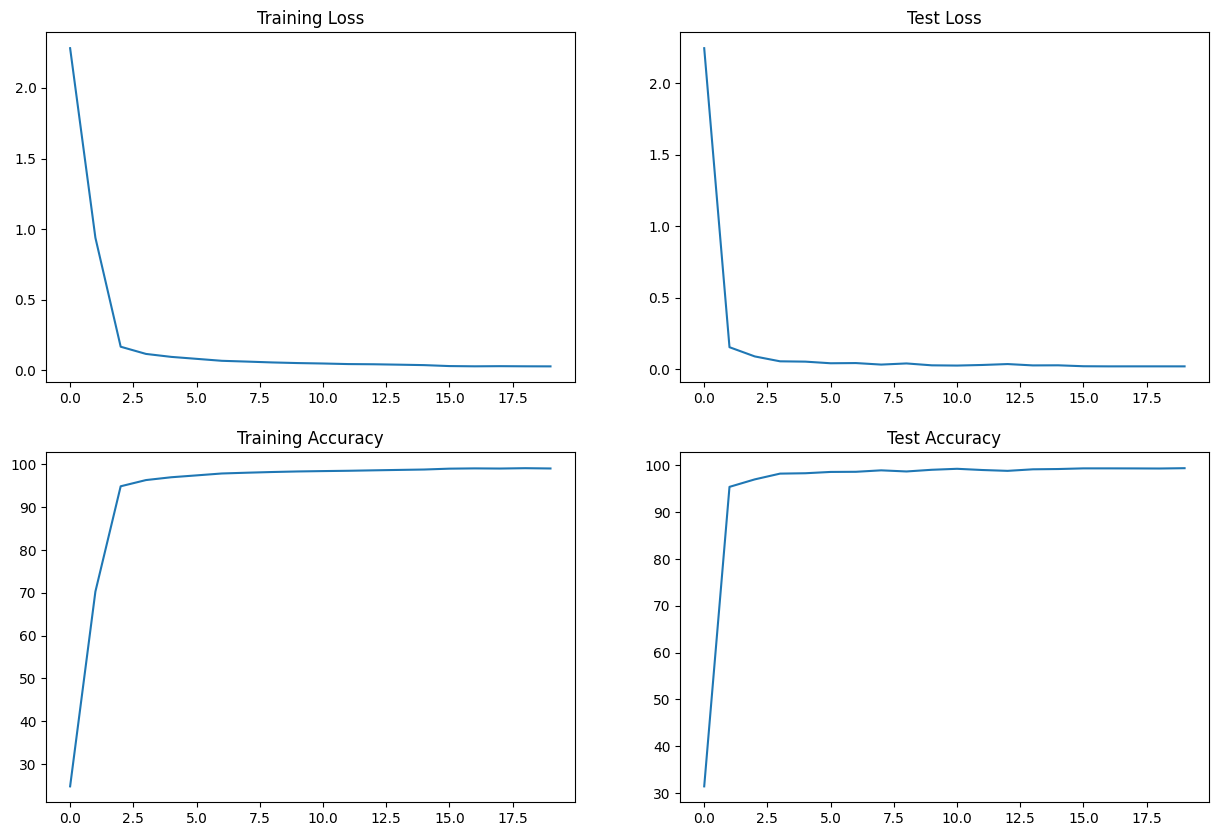

In [16]:
display_model_stats(train_losses, train_acc, test_losses, test_acc)

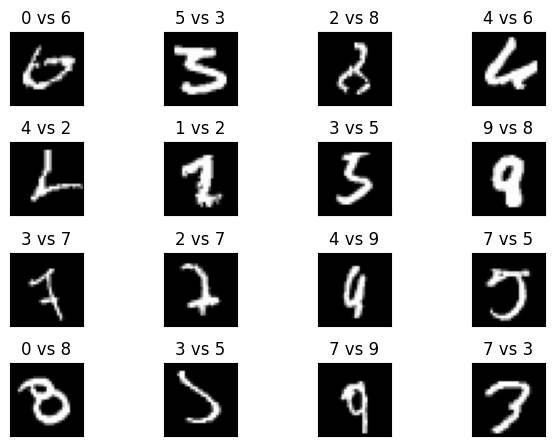

In [17]:
from model import get_incorrect_test_predictions
from utils import plot_test_incorrect_predictions
incorrect_pred = get_incorrect_test_predictions(model, device, test_loader) # Predicted vs Actual
plot_test_incorrect_predictions(incorrect_pred)

In [18]:
model2 = Net2().to(device)
model2.summary(input_size=(1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Net2                                     [1, 28, 28]               [1, 10]                   --                             --
├─Conv2d: 1-1                            [1, 28, 28]               [32, 26, 26]              288                         0.05%
├─Conv2d: 1-2                            [32, 26, 26]              [64, 24, 24]              18,432                      3.11%
├─Conv2d: 1-3                            [64, 12, 12]              [128, 10, 10]             73,728                     12.44%
├─Conv2d: 1-4                            [128, 10, 10]             [256, 8, 8]               294,912                    49.76%
├─Linear: 1-5                            [1, 4096]                 [1, 50]                   204,800                    34.56%
├─Linear: 1-6                            [1, 50]                   [1, 10]                   500               